In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the image
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

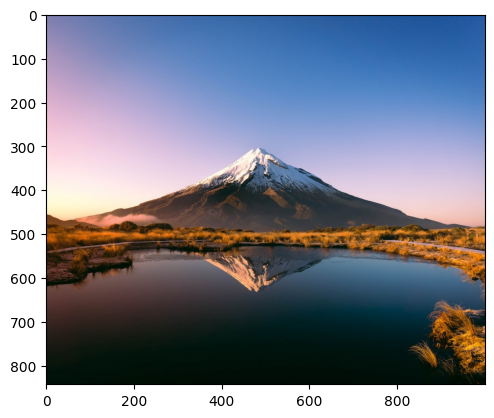

In [ ]:
filename = "/content/scenery.jfif"
img = read_file(filename)

org_img = np.copy(img)

In [ ]:
#create edge mask
def edge_mask(img, line_size, blur_value):
  """
  input: any input Image
  output: Edges of Images

  """
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255 , cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

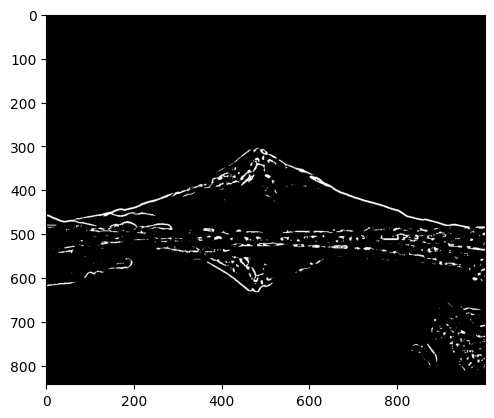

In [ ]:
line_size, blur_value = 9,9
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap = "binary")
plt.show()

In [ ]:
#Reduce the Colour Palette
def color_quantization(img , k):

  #Transform the image
  data = np.float32(img).reshape((-1,3))

  #Determine Criteria
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  ## IMPLEMENTING K- Means
  ret , label , center = cv2.kmeans(data, k, None , criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

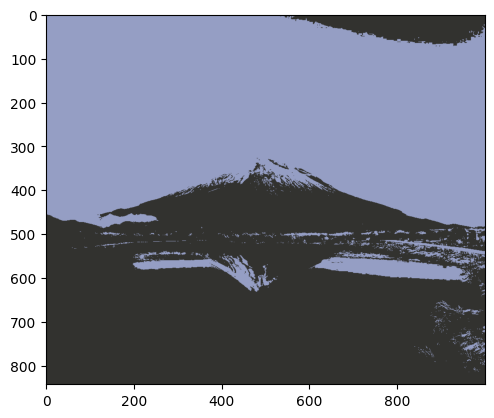

In [ ]:
img = color_quantization(img, k=2)
#displays two of the most prominent colors
plt.imshow(img)
plt.show()

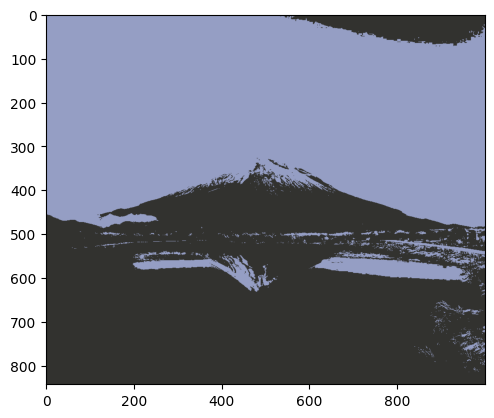

In [ ]:
#to show 1, 3, 5 etc prominent colors
#we change the name to img_quantiz to do that
img_quantiz = color_quantization(img, k=9)

plt.imshow(img)
plt.show()
#still same because these are most prominent

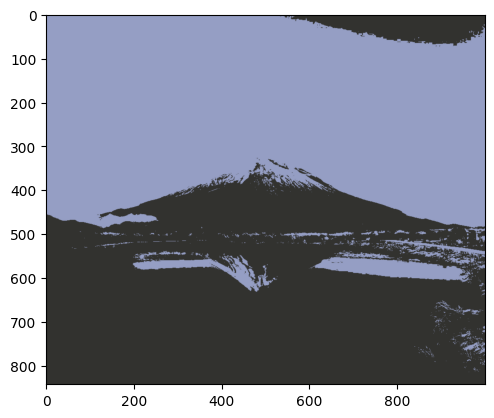

In [ ]:
#LETS add a filter to REDUCE SOME MORE NOISE

blurred = cv2.bilateralFilter(img, d= 2, sigmaColor=200, sigmaSpace= 200)

plt.imshow(blurred)
plt.show()

In [ ]:
#now we combine the images
#COMBINE EDGE MASK WITH QUANTIZ IMG
def cartoon():
  c = cv2.bitwise_and(blurred, blurred , mask= edges)

  plt.imshow(c)
  plt.title("Cartoonified Image")
  plt.show()

  plt.imshow(org_img)
  plt.title("Original Image")
  plt.show()

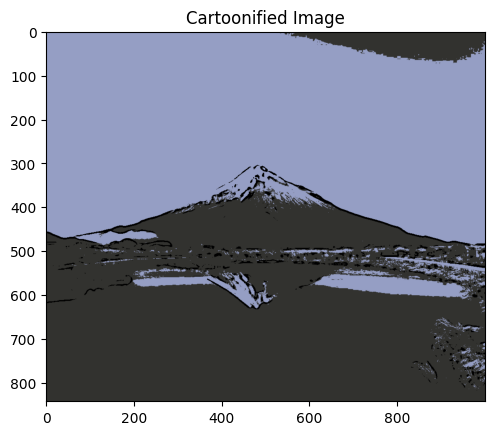

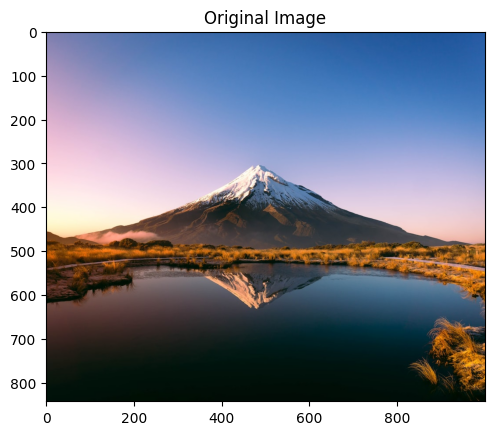

In [ ]:
cartoon()